### Text Emotion Data

In [1]:
# buiding function for collecting data 
# used in showing the text and image captcha
import pandas as pd
import json 
import random

In [2]:
# data laoding with a single function 
def load_dataset(path): 
    train_data = ""
    with open(path, 'r') as train_file: 
        train_data = train_file.read()
    
    train_data = train_data.split('\n')
    train_set = {
    'text': [], 
    'tag':[]
    }
    for data in train_data: 
    #     print('do')

        row = data.split(';')
        if len(row) != 2:
            print(row)
        else:
            txt, emo  = data.split(';')
            train_set['text'].append(txt)
            train_set['tag'].append(emo)
    
    return pd.DataFrame(train_set)


def get_emotion_sample(data): 
    json_emo = data.to_json(orient='records')
    emotion_data = json.loads(json_emo)
    index = random.choice(range(0, len(emotion_data)))
    return emotion_data[index] 

In [3]:
# load data
test_df = load_dataset('text_emo/test.txt')

['']


In [4]:
test_df.tag.unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [5]:
get_emotion_sample(test_df)

{'text': 'i feel that i could be gentle you light up my future', 'tag': 'love'}

### Image Emotion Data

In [6]:
import pathlib
import numpy as np

url = 'emotion_image/'

img_path  =  pathlib.Path(url)
img_list = [str(img) for img in list(img_path.glob('angry/*.png'))]

In [7]:
img_diction = {
    'images':{
    'angry':[str(img) for img in list(img_path.glob('angry/*.png'))], 
    'fearful': [str(img) for img in list(img_path.glob('fearful/*.png'))], 
    'happy':[str(img) for img in list(img_path.glob('happy/*.png'))], 
    'sad': [str(img) for img in list(img_path.glob('sad/*.png'))], 
    'surprised':[str(img) for img in list(img_path.glob('surprised/*.png'))]
    },

    'label':{
    'angry': 0, 
    'fearful': 1,
    'happy': 2,
    'sad': 3,
    'surprised': 4
    }
,
    'size':{
    'angry':len([str(img) for img in list(img_path.glob('angry/*.png'))]), 
    'fearful': len([str(img) for img in list(img_path.glob('fearful/*.png'))]), 
    'happy':len([str(img) for img in list(img_path.glob('happy/*.png'))]), 
    'sad': len([str(img) for img in list(img_path.glob('sad/*.png'))]), 
    'surprised':len([str(img) for img in list(img_path.glob('surprised/*.png'))])
    }
}


val = np.max(list(img_diction['size'].values()))

22
lable tag :  4


Text(0.5, 1.0, 'surprised')

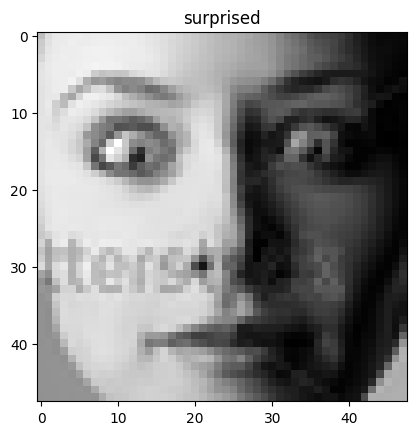

In [8]:
import cv2
import matplotlib.pyplot as plt

emo = random.choice(['angry', 'fearful', 'happy', 'sad', 'surprised'])
img_index = random.choice(range(0, val))
print(img_index)

img = cv2.imread(img_diction['images'][emo][img_index])
lbl = img_diction['label'][emo]
print('lable tag : ', lbl)
plt.imshow(img)
plt.title(emo)

In [117]:
from scipy import stats

In [119]:
import scipy

help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     datasets                     --- Dataset methods
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas

In [107]:
def get_image_random_data(img_diction):
    val = np.max(list(img_diction['size'].values()))

    images, labels = [] , []
    col_image = [] 
    
    for index in range(6): 
        emo = random.choice(['angry', 'fearful', 'happy', 'sad', 'surprised'])
        img_index = random.choice(range(0, val))
        print(img_index)
        img = cv2.imread(img_diction['images'][emo][img_index])
        lbl = img_diction['label'][emo]
        col_image.append(emo)

        # stor
        images.append(img)
        labels.append(lbl)
    
    print(col_image)
    print(stats.mode(np.array(col_image))[0])
    caller = stats.mode(np.array(col_image))[0]
    print(caller[0])
    print(img_diction['label'][caller[0]])
    # plt.imshow(img)
    # plt.title(emo)

    
    
    return  {'index':range(6) ,'img':images, 'lbl':labels}
        

In [108]:
random_img = get_image_random_data(img_diction)

20
6
7
8
3
16
['angry', 'angry', 'angry', 'sad', 'fearful', 'happy']
['angry']
angry
0


C:\Users\HP\AppData\Local\Temp\ipykernel_15560\3684536281.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(np.array(col_image))[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_15560\3684536281.py:20: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  print(stats.mode(np.array(col_image))[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_15560\3684536281.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `

In [86]:
random_img['lbl']

[4, 2, 2, 2, 3, 0]

In [12]:
img_diction['images']['angry'][0].split('emotion_image\\')[-1]

'angry\\im0.png'

In [63]:
for index, cat in enumerate(img_diction['images']):
    print(index, cat)
    

0 angry
1 fearful
2 happy
3 sad
4 surprised


In [122]:
img_diction['label']

{'angry': 0, 'fearful': 1, 'happy': 2, 'sad': 3, 'surprised': 4}